# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file.

In [43]:
#pista, from scipy.io
data = scipy.io.loadmat('/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/1-Supervisado/3-Reg&Class/7-SVM/ejercicios/data/ejer_1_data1.mat')

x = data['X']
y = data['y']

In [44]:
# keys
df.keys()



Index(['x1', 'x2'], dtype='object')

In [47]:
# Suponiendo que x1, x2, y son tus arrays de datos
# Asegurarse de que los arrays sean unidimensionales
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
y = y.reshape(-1, 1)


#### 3. Create a DataFrame with the features and target

In [48]:
import pandas as pd


# Crear un DataFrame con x1, x2, y como columnas
df = pd.DataFrame({'x1': x1.flatten(), 'x2': x2.flatten(), 'y': y.flatten()})
df

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


#### 4. Plot a scatterplot with the data

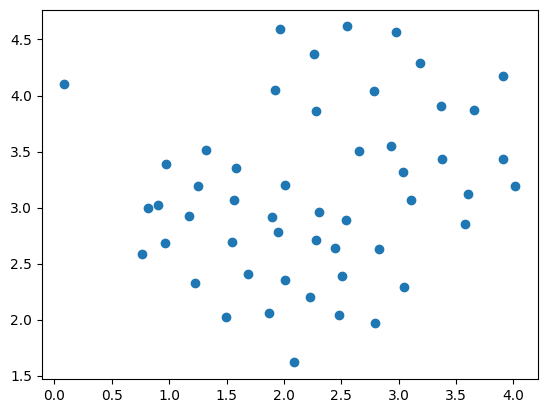

In [49]:
plt.scatter(x1,x2)

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [50]:
from sklearn.svm import LinearSVC


In [51]:
LinearSVC(C=1, loss='hinge', max_iter=10000)

LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [52]:
# Aquí el ejecicio no esta haciendo el train_test_split, así que haz el fit con todo el dataset

In [54]:
# Crear un modelo LinearSVC
model = LinearSVC()

# Ajustar el modelo con todo el conjunto de datos
model.fit(df[['x1', 'x2']], y)

/Users/carlosoliver/miniconda3/envs/“ML_ENV”/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlosoliver/miniconda3/envs/“ML_ENV”/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [55]:
from sklearn.metrics import accuracy_score

# Instanciar el modelo LinearSVC con el parámetro C específico
model = LinearSVC(C=375)

# Ajustar el modelo con los datos X y y
model.fit(df[['x1', 'x2']], y)

# Realizar predicciones en los mismos datos X
y_pred = model.predict(df[['x1', 'x2']])

# Calcular la precisión del modelo
accuracy = accuracy_score(y, y_pred)

print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9411764705882353


/Users/carlosoliver/miniconda3/envs/“ML_ENV”/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlosoliver/miniconda3/envs/“ML_ENV”/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/carlosoliver/miniconda3/envs/“ML_ENV”/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Value of C in this case is C = 375
# Do the same thing of previous section: instance the model, fit X and y, get the score

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

/Users/carlosoliver/miniconda3/envs/“ML_ENV”/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


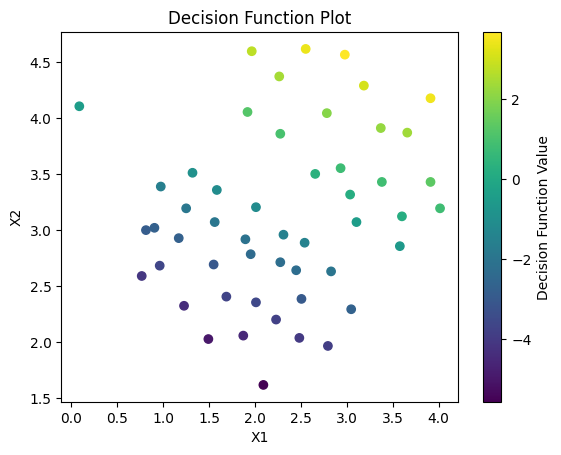

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las predicciones de la función de decisión para cada punto en el conjunto de datos
decision_values = model.decision_function(x)

# Crear un scatterplot de los datos X1 y X2, y usar el valor de decision_function() para los colores
plt.scatter(x1, x2, c=decision_values, cmap='viridis')
plt.colorbar(label='Decision Function Value')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Function Plot')
plt.show()



In [26]:
conf_level

array([ 0.80278593,  0.3838553 ,  1.37742261,  0.52109694,  0.33331643,
        0.86860562,  0.68644079,  1.61112044,  0.83441571,  1.16707374,
        1.07316037,  0.22972916,  0.331777  ,  0.79575449,  0.31573087,
        1.27401816,  1.21010843,  0.99988323,  0.56465913,  0.38981932,
       -0.43527164, -0.30885316, -0.68626448, -0.5540297 , -0.33251787,
       -0.29385666, -0.4407223 , -0.9840001 , -0.68564223, -1.32848517,
       -1.00379796, -1.49230926, -0.61142573, -0.68344774, -1.00004185,
       -1.15274784, -1.57841683, -1.35598344, -1.03239924, -1.18504121,
       -0.7714105 , -0.76692628, -0.46650197, -1.        , -0.51034432,
       -0.85864953, -1.55903573, -0.25490236, -1.11364769, -1.54719253,
       -0.70993965])

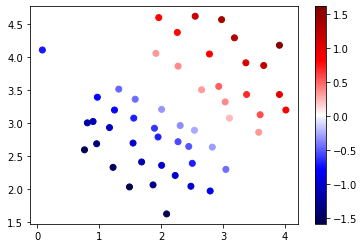

#### 9. Do the same with the second model

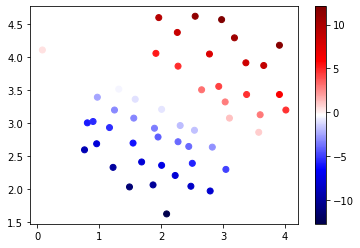

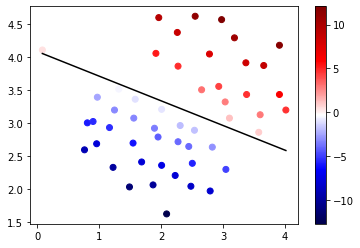

In [42]:
# extra
# w = svc.coef_[0]           # w consists of 2 elements
# b = svc.intercept_[0]      # b consists of 1 element
# x_points = df['x1'].sort_values()    # generating x-points
# y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting 


Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [69]:
data2 = scipy.io.loadmat('/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/1-Supervisado/3-Reg&Class/7-SVM/ejercicios/data/ejer_1_data2.mat')
data2


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [85]:
X1 = data2['X'][:,:1]
X2 = data2['X'][:,1:2]
y = data2['y']
data2.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [88]:
import pandas as pd

# Asegurarse de que los arrays sean unidimensionales
X1_flat = X1.flatten()
X2_flat = X2.flatten()
y_flat = y.flatten()

# Crear un DataFrame con los arrays X1, X2 y y
df2 = pd.DataFrame({'X1': X1_flat, 'X2': X2_flat, 'y': y_flat})

df2



,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


In [89]:
# Haz un value_counts() de la columna y 
df2['y'].value_counts()

y
1    480
0    383
Name: count, dtype: int64

1    480
0    383
Name: y, dtype: int64

#### 3. Plot a scatterplot with the data

<Axes: xlabel='X1', ylabel='X2'>

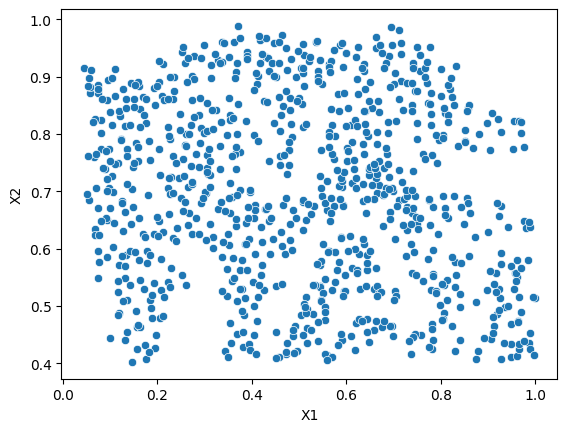

In [103]:
sns.scatterplot(x='X1', y='X2', data=df2)


For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [97]:
from sklearn.svm import SVC

# Declarar el clasificador SVC con los hiperparámetros dados
classifier = SVC(C=100, gamma=10, probability=True)


In [98]:
classifier

SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [104]:
classifier.fit(df2[['X1', 'X2']], y)

score = classifier.score(df2[['X1', 'X2']], y)

# Imprimir la puntuación
print("Score:", score)

Score: 0.9698725376593279


/Users/carlosoliver/miniconda3/envs/“ML_ENV”/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) with `predict_proba`

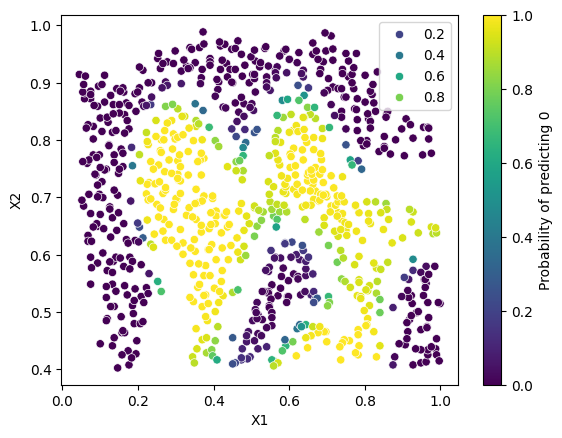

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las probabilidades de predicción para la clase 0
proba_0 = classifier.predict_proba(df2[['X1', 'X2']])[:, 0]

# Trazar un gráfico de dispersión de las columnas 'X1' y 'X2'
# Colorear los puntos según la probabilidad de predecir la clase 0
scatter = sns.scatterplot(x='X1', y='X2', hue=proba_0, palette='viridis', data=df2)

# Añadir una barra de color manualmente
plt.colorbar(scatter.collections[0], label='Probability of predicting 0')
plt.show()


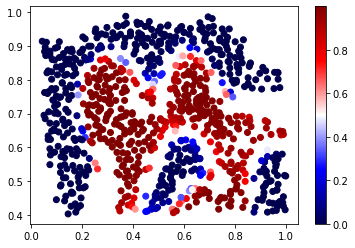